In [39]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

aapl = yf.download('aapl','2018-01-01')
nvda = yf.download('nvda','2018-01-01')
amd = yf.download('amd','2018-01-01')
ibm = yf.download('ibm','2018-01-01')

stocks = pd.concat([aapl,nvda,amd,ibm], axis = 1)
stocks.columns = pd.MultiIndex.from_product([['aapl', 'nvda', 'amd', 'ibm'], 
                                             ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
# stocks.loc[:, (slice(None), 'Close')]

log_returns = np.log(stocks.loc[:, (slice(None), 'Close')]).diff().dropna()
print(log_returns)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                aapl      nvda       amd       ibm
               Close     Close     Close     Close
Date                                              
2018-01-03 -0.000174  0.063739  0.050610  0.027117
2018-01-04  0.004634  0.005257  0.048172  0.020051
2018-01-05  0.011321  0.008438 -0.020001  0.004874
2018-01-08 -0.003721  0.030181  0.033116  0.006013
2018-01-09 -0.000115 -0.000270 -0.038179  0.002200
...              ...       ...       ...       ...
2023-09-13 -0.011926  0.013613  0.022534  0.001707
2023-09-14  0.008744  0.002108 -0.010078  0.005444
2023-09-15 -0.004163 -0.037577 -0.049405 -0.009273
2023-09-18  0.016772  0.001502  0.008633 -0.006184
2023-09-19  0.006162 -0.010196 -0.007452  0.009808

[1437 row

In [41]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, 4))  # Adjusted the dimension here
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# Ensure log_ret is for the 'Close' prices
log_ret = np.log(stocks.loc[:, (slice(None), 'Close')]).diff().dropna()

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [47]:
print("Max sharpe ratio: {}".format(sharpe_arr.max()))
print("Min sharpe ratio: {}".format(sharpe_arr.min()))
print("Location in the array: {}".format(sharpe_arr.argmax()))


Max sharpe ratio: 0.8512121331594475
Min sharpe ratio: 0.18627818760991666
Location in the array: 1486


In [48]:
print(all_weights[1486,:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.58423412 0.20666429 0.20481074 0.00429084]


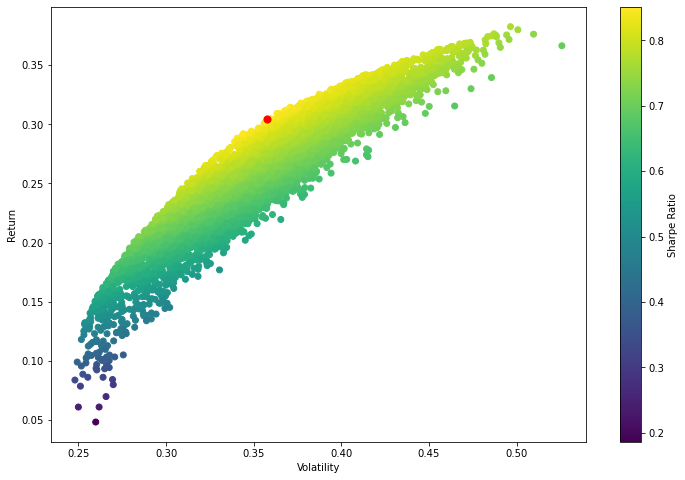

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()